In [1]:
# Import Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib inline
%pylab inline

/Users/Xander_Griff/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Xander_Griff/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


In [138]:
# Import and Preview Datafile

df = pd.read_csv('./speed_dating_data.csv', encoding="ISO-8859-1")
pd.set_option('display.max_columns', None)
df.head(5)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [3]:
'''
With the data imported, it was possible to view a summary of attribute values.
Using the describe() function, metrics including count, standard deviation, and mean were
found for all numeric attributes.
'''

# get high level statistics on dataset
df.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8281.000000,8299.000000,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,8.963595,283.863767,0.164717,0.196010,0.395799,26.364999,2.756653,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,0.419551,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,6.134498,5.208251,1.960215,26.358928,7.662488,2.757186,3.784793,3.651645,2

In [139]:
'''
Having now taken a look at the preview of the dataset along with some cursory metrics, it was possible to go
through the first iteration of the CRISP-DM procedure with the goal of establishing a baseline prediction model using
a naive approach. The idea here being that any subsequent applied data processing techniques will be inherently
more involved and thus more costly than a naive approach. Thus, if these techniques are to be applied, they must be
justifiably useful. 

The naive approach, designed for simplicity of implementation rather than performance, is defined here as a series
of steps to remove any problematic aspects of the dataset. Given that any missing values would prove problematic for
prediction, any column attributes with missing data were removed. On top of that, it was theorized that rows from the
series of waves in which a secondary preference scale was used would also have to be removed. However, on inspection
of the missing-data-adjusted dataset, it was found that no columns pertinent to the scoring process remained. In fact,
only 13 columns of the initial 195 columns had no missing data.

Clearly, there is a significant reduction to the information content of the dataset, and thus expectations for
prediction accuracy are low. However, given as this is a baseline test, it leaves a great deal of room for improvement.
'''

# remove all columns with missing values
naive_df = df.dropna(axis=1, how='any')

In [105]:
'''
This initially defined method for establishing a baseline predictive model did not work as planned. Of the 13 
attributes in this initial naive set, 3 attributes (match, dec_o and dec) were not available for model generation as
they were either the target attribute for prediction or a direct function of the target attribute. This left the naive
set with a mere 10 attributes, many of which were used procedurally during data collection and had no real influence 
on the experience of the speed daters (iid, idg, wave, round, position, etc.).

Thus, a more involved method would have to be adopted for establishing even the simplest of models. To do this, a 
method was crafted that takes as input a dataset and outputs a confusion matrix based on a Random Forest learning
model applied to the input dataset. Random Forest learning was selected due to its strengths in handling large
numbers of attributes, which is one of the most prominent features of this dataset.Using this model, the initial 
dataset would be simplified based on the error messages given as the function fails due to dataset complications.

For example, when the function was applied to the initial dataset, it provided an error message notifying that it
could not take string values as attribute values. Thus, any column that had string values was removed. 
'''
def predict(dataset):
    # define test and training sets
    naive_train, naive_test = train_test_split(dataset,test_size=0.25)

    # extract feature and target values from training set
    train_features = naive_train.drop(['match', 'dec', 'dec_o'], axis=1)
    train_targets = pd.factorize(naive_train['match'])[0]

    # extract feature and target values from test set
    test_features = naive_test.drop(['match', 'dec', 'dec_o'], axis=1)
    test_targets = pd.factorize(naive_test['match'])[0]

    # train model based on training set
    clf = RandomForestClassifier(n_estimators=100, n_jobs=2, random_state=0)
    clf.fit(train_features, train_targets)
    
    # test model using test set
    predictions = clf.predict(test_features)

    # generate and return confusion matrix
    
    cm = pd.crosstab(test_targets, predictions, rownames=['Actual'], colnames=['Predicted'])
    acc = accuracy_score(test_targets, predictions)
    s = "Prediction Accuracy: " + str(acc)
    print(s)
    return cm

In [71]:
# Test 1: Predict on entire dataset
# predict(df)
# Failed due to presence of strings

# Remove String values
naive_df = df.select_dtypes(exclude=['O'])

# Test 2: Predict on set with removed string attributes
# predict(naive_df)
# Failed due to presence of missing values

# Assign missing values the value of the attribute column mean
naive_df = naive_df.apply(lambda x: x.fillna(x.mean()),axis=0)

# Test 3: Predict on set with mean-imputed values
predict(naive_df)
# Succeeded

Prediction Accuracy: 0.846778042959


Predicted,0,1
Actual,,
0,1701,42
1,279,73


With a base level of predictive accuracy found to be about 84%, based on output in the above confusion matrix,
it was now possible to move forward to the next iteration of the CRISP-DM process. That is to say, it was time to
look at the dataset and see if improvements could be made to any of the steps taken to create the predictive model.

The first step was data preprocessing, which required a deeper analysis of the dataset documentation. Going through
each attribute, it was possible to find more performant methods of imputation, discretization and normalization than 
applied in the naive approach.

This involves the somewhat arduous task of checking the state of each attribute column for missing values, outliers,
mistakes, and inconsistencies between waves. The table generated with the .describe() method above was particularly 
useful for determining outliers by checking the minimum and maximum values with the allowed values in the data key 
specifications. 

As there were almost 200 attributes in the dataset, some methodology had to be defined to approach preprocessing, so
as to prioritize the most important features and minimize unnecessary work. The first metric that informed the 
methodology of approach was the percent of missing values in an attribute column. If the majority of the values of a
given attribute were missing, there would be no point in trying to impute values as it increase the liklihood of
innaccuracy to an unacceptable degree. Another metric to consider was attribute correlation. Ideally, attributes have
high correlation to the attribute being predicted and low correlation with each other. If any attributes were 
extremely correlated with one another, it might be possible to remove them. However, as correlation is non-transitive,
one cannot eliminate attributes based on high correlation alone, and must consider contextual information and percent-
missing values of the attributes as well.

In [137]:
# PERCENT MISSING VALUES

# returns the a sorted array containing the percentage of missing values of each column
def sorted_list_of_missing(df_in): 
    length = len(df_in.columns)
    column_headers = list(df_in.columns.values)
    rows = len(df_in)
    to_sort = {}
    for i in range(0, length):
        column_name = column_headers[i]
        total_missing = sum(df_in[column_name].isnull().values.ravel())
        percent = total_missing / rows * 100
        to_sort[column_name] = percent
    has_sorted = sorted(to_sort.items(), key=lambda x:x[1], reverse=True)
    return has_sorted

p_m = sorted_list_of_missing(df)
p_m

[('num_in_3', 92.026736691334449),
 ('numdat_3', 82.143709715922654),
 ('expnum', 78.515158749104799),
 ('sinc7_2', 76.665075196944372),
 ('amb7_2', 76.665075196944372),
 ('shar7_2', 76.43829076151826),
 ('attr7_2', 76.318930532346613),
 ('intel7_2', 76.318930532346613),
 ('fun7_2', 76.318930532346613),
 ('attr7_3', 75.936977798997376),
 ('sinc7_3', 75.936977798997376),
 ('intel7_3', 75.936977798997376),
 ('fun7_3', 75.936977798997376),
 ('amb7_3', 75.936977798997376),
 ('shar7_3', 75.936977798997376),
 ('shar2_3', 75.936977798997376),
 ('attr5_3', 75.936977798997376),
 ('sinc5_3', 75.936977798997376),
 ('intel5_3', 75.936977798997376),
 ('fun5_3', 75.936977798997376),
 ('amb5_3', 75.936977798997376),
 ('attr4_3', 64.681308188111714),
 ('sinc4_3', 64.681308188111714),
 ('intel4_3', 64.681308188111714),
 ('fun4_3', 64.681308188111714),
 ('amb4_3', 64.681308188111714),
 ('shar4_3', 64.681308188111714),
 ('attr2_3', 64.681308188111714),
 ('sinc2_3', 64.681308188111714),
 ('intel2_3', 64.6

In [7]:
# CORRELATIONS 

def find_correlations(df):
    return df.corr()['match'].sort_values(ascending=False)

corrs = find_correlations(df)
corrs

match       1.000000
dec_o       0.522326
dec         0.521943
like_o      0.305853
like        0.305723
fun_o       0.277700
fun         0.277545
shar_o      0.270840
shar        0.270679
attr_o      0.260837
attr        0.260676
prob_o      0.255574
prob        0.255531
them_cal    0.202762
intel       0.169532
intel_o     0.169448
sinc_o      0.164523
sinc        0.164449
num_in_3    0.156042
expnum      0.143755
amb         0.140042
amb_o       0.139927
match_es    0.130592
date_3      0.127916
numdat_3    0.114468
you_call    0.083922
fun7_2      0.073412
fun3_2      0.060186
satis_2     0.059370
fun1_2      0.058183
              ...   
sinc7_3    -0.028560
shar4_2    -0.029636
amb1_s     -0.030083
sinc5_3    -0.031990
sinc1_1    -0.032325
pf_o_sin   -0.032391
shar1_s    -0.033093
amb4_2     -0.033253
round      -0.033257
shar2_2    -0.034974
age        -0.035055
shar1_3    -0.035289
age_o      -0.035865
sinc4_3    -0.037210
shar2_1    -0.037709
sinc2_3    -0.038329
order      -0

In [8]:
'''
During research into defining the acceptable percent of missing data, an paper was found on methods of
imputation, which mentioned a technique called "Last observation carried forward," which entails using data from the
past to inform missing follow-up data. This paradigm might prove particularly useful for 'followup' attributes where 
data was missing, as 'intial' attributes had much lower rates of missing data.
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/

At this point, however, the correlation of attributes to one another had to be considered. Because the followup attributes
measure the same metric varied over time, it was hypothesized that they had relatively high correlations with one
another and, combined with the fact that they were missing a majority of the time based on observation, they could
be eliminated rather than imputated. 

To confirm this was the case, a multiple step process was necessary. First, although initial observation of the 
percent-missing values of the followup attributes seemed relatively high, this observation had to be confirmed with
actual data. Thus, the average percent-missing value was calculated for any attribute with the suffix '_2' or '_3'
'''

## Eliminating missing followup data

# STEP 1: Average Percent-Missing Value

followup_p_m = {}
followup_p_m_avg = 0
for i in p_m:
    if('_2' in i[0] or '_3' in i[0]):
        followup_p_m[i[0]] = i[1]
        followup_p_m_avg += i[1]

followup_p_m_avg /= len(followup_p_m)
followup_p_m_avg = round(followup_p_m_avg)
print("The followup percent-missing value is: " + str(followup_p_m_avg) + "%")

'''
Given that the percent-missing average is 50%, its clear that a significant amount of values are missing from followup
attributes. If it can be proven that these attributes are correlated to their 'initial' counterparts, they can be
sensibly eliminated. To do this, one of the attributes, attractiveness, was selected as a proxy for all attributes, and
the attributes with the highest correlations were found for each of the five followup categories.
'''

## Step 2: Find correlations

print('\nHighest correlations between intial attributes')
for i in range(1,6):
    attribute = 'attr' + str(i) + '_1'
    correlated = df.corr()[attribute].sort_values(ascending=False).head(4)
    
    print(correlated)
   
'''
Seeing as the most attributes most correlated with the 'initial' attribute were, for the most part, the 'followup'
attributes, these attributes could be eliminated from the dataset due to their high missing value rate and high
correlation to intial attributes.
'''

## Step 3: Remove followup values
preproc_df = df[df.columns.drop(list(df.filter(regex='_2')))]
preproc_df = preproc_df[preproc_df.columns.drop(list(preproc_df.filter(regex='_3')))]


The followup percent-missing value is: 50.0%

Highest correlations between intial attributes
attr1_1    1.000000
attr1_2    0.767458
attr1_3    0.730329
attr1_s    0.712531
Name: attr1_1, dtype: float64
attr2_1    1.000000
attr2_2    0.737818
attr2_3    0.656292
attr4_1    0.503234
Name: attr2_1, dtype: float64
attr3_1    1.000000
attr5_1    0.848215
attr3_2    0.781224
attr3_s    0.754540
Name: attr3_1, dtype: float64
attr4_1    1.000000
attr4_3    0.816252
attr4_2    0.783549
attr2_3    0.629471
Name: attr4_1, dtype: float64
attr5_1    1.000000
attr3_1    0.848215
attr5_3    0.775104
attr5_2    0.751127
Name: attr5_1, dtype: float64


In [9]:
preproc_df.head(5)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,length,you_call,them_cal
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0


In [10]:
'''
With followup attributes eliminated, the next step in the preprocessing phase involved normalizing the scores of the
attribute values. Namely, the different scales used in Waves 6-9 and the budget imposed on participants in Wave 12. 

'''

## Dealing with the inconsistencies:

# Step 1: Wave 12 Budget
'''
The budget limitation present in Wave 12, which dictated that a participant was able to "say yes" to only 50% of 
people they met during the session. This imposes inherent pyschological conditions on the participants that was not
present in other waves. Thus, there is no method for normalizing this data, and it must be omitted.
'''

preproc_df = preproc_df[preproc_df.wave != 12]

# Step 2: Waves 6-9 Point Scale
'''
The point scale difference in Waves 6 through 9 is a more complex issue to deal with, as the only change in conditions
for the participants was the scale upon which they would rate their matches. Namely, the scoring was changed from a 
1-100 to a 1-10 score for these rounds. Thus, it would seem as though normalization techniques could be applied. 

However, the scores could not simply be scaled by a factor of 10 due to differences in point allocation. The 1-10 scale
involved simply ranking one's match out of 10 on each of the six judged attributes, while the 1-100 scale forced the 
participants to allocate a budget of 100 points across all six of the judged attributes 

An argument could be made here that, similar to in Wave 12, a change in the nature of scoring could be a problematic 
influence on the way participants scored their matches. However, both scoring methods required the participants to
rank their matches on a limited scale, so if one method of scoring could be converted to the other, they would,
hypothetically, be quite similar indeed.

To convert the 1-10 scores to 1-100 scores, an algorithm was generated that accounts for the 100 point budget. The
algorithm works as follows: 

For each of the six categories, a 1-10 ranking is given. Thus, in a sense there a total of 60 points available for
allocation, although not all must be used. However, as the goal is simply to find the relative scores, the
ratio of the fraction of the score of one category to the total number of points given in all categories would be an 
accurate representation of the relative score in that category.

For example, given a score of [6,7,8,5,9,7] for each of the six categories, the algorithm would work as follows:

Total Score = 6 + 7 + 8 + 5 + 9 + 7 = 42

6 / 42 = 14%
7 / 42 = 16%
8 / 42 = 19%
5 / 42 = 12%
9 / 42 = 21%
7 / 42 = 16%

Given that there are 100 total points, point allocation in each category would exactly map to the percentages calculated
above. Thus, the output of the algorithm would be

[14,16,19,12,21,16]

A particularly observant reader would notice that the total of the above allocation is 98. This is due to introduction
of error made during the scaling process. However, minor discrepancies in overall point totals far outweigh prior
differences due to scoring inconsistencies. 

During testing of the algorithm, another inconsistency was found. As it turns out, despite the data key specifically
denoting which columns used the different scoring method during Waves 6 through 9, some column attributes actually
already used the scoring method from Waves 1 through 5 and Wave 10 onwards. However, the conversion algorithm
is built in a way that does not to change the values of any of the relative scores, and thus it could be applied safely
to the expected column attributes in case the alternate scoring method was used.
'''

for i, row in preproc_df.iterrows():
    if((row['wave'] >= 5) and (row['wave'] <= 10)):
        # Check if missing
        pf = row['pf_o_att':'pf_o_sha']
        one_one = row['attr1_1':'shar1_1']
        four_one = row['attr4_1':'shar4_1']
        two_one = row['attr2_1':'shar2_1']
    
        arr_of_rows = [pf, one_one, four_one, two_one]
        
        # perform calculation
        for test_row in arr_of_rows:
            if(not test_row.isnull().any()):
                add = test_row.sum()
                for k,v in test_row.iteritems():
                    val = v/add * 100
                    # apply calculation
                    #print(i)
                    #print(preproc_df.columns.get_loc(k))
                    #print(k)
                    #print(val)
                    #print('\n')
                    preproc_df.loc[i, k] = val


print("Finished adjusting scores")

Finished adjusting scores


In [11]:
'''
With adjustments made to the scoring system as detailed above, it was time to evaluate the changes to ensure that
they had a net positive effect. The same methods of imputation and prediction for the naive model were applied to
this newly preprocessed dataset. As seen in FIGURE, the prediction accuracy clearly improved, reflecting the improvements
made to the dataset. It was also noted that the generated predictive model had a much tougher time dealing with
predicting matches than non-matches. It was hypothesized that it might therefore prove useful to explore the rows 
where matches occur and see if any conclusions can be drawn from clustering methods.
'''

test_preproc_df = preproc_df.select_dtypes(exclude=['O'])
test_preproc_df = test_preproc_df.apply(lambda x: x.fillna(x.mean()),axis=0)
predict(test_preproc_df)

Prediction Accuracy: 0.859789684527


Predicted,0,1
Actual,,
0,1636,34
1,246,81


Text(0,0.5,'Correlation')

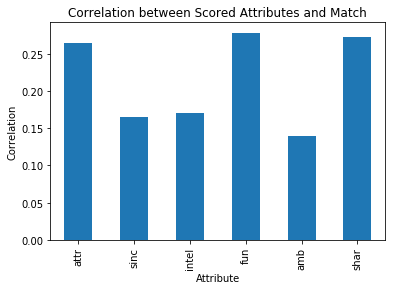

In [12]:
'''
To further explore the relation of various attributes to matches, a number of methods were theorized to be useful based
on the correlation values found using the find_correlations() method developed above. The first was to explore the 
correlations between matches and the six attributes used to score partners (attractiveness, sincerity, fun, etc.). 
Similarly, correlations would also be explored between matches and interests. 
'''

## Scored Attributes of Partner

score_corr = preproc_df.corr()['match']['attr':'shar']
sc_plot = score_corr.plot(kind='bar', title='Correlation between Scored Attributes and Match')
sc_plot.set_xlabel("Attribute")
sc_plot.set_ylabel("Correlation")

Text(0,0.5,'Correlation')

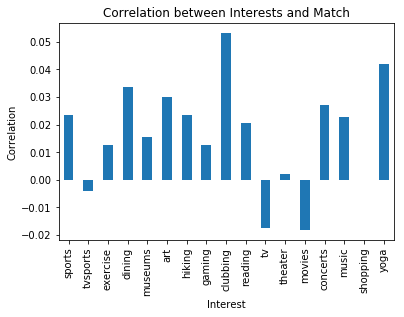

In [13]:
## Interests

interest_corr = preproc_df.corr()['match']['sports':'yoga']
ic_plot = interest_corr.plot(kind='bar', title='Correlation between Interests and Match')
ic_plot.set_xlabel("Interest")
ic_plot.set_ylabel("Correlation")

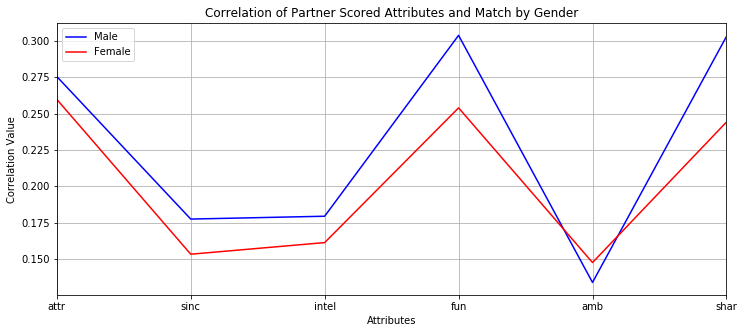

In [14]:
'''
In trying to understand correlations between various attributes, it occured to me that a possible method for imputation
would be to add a degree of intelligence to the imputation process by first considering possible clusters and imputing
based on the mean of those clusters, rather than the mean of the whole dataset. For example, considering that different
genders or different cultural groups may have different correlations between the above interests and matches, missing
values in these categories could be imputed from the means of these groups rather than the attribute mean for the entire
dataset.

First, however, it would be necessary to observe whether or not belonging to these groups actually had an impact on
the correlation values. To do this, parallel visualization was implemented, with color coded lines to indicate belonging
to either a gender or racial group.
'''

## GENDER

interest_corr_m = preproc_df.loc[preproc_df['gender']==0].corr()['match']['attr':'shar']
#print(interest_corr_m)
interest_corr_f = preproc_df.loc[preproc_df['gender']==1].corr()['match']['attr':'shar']
#print(interest_corr_f)

plt.figure(figsize=(12,5))
plt.title('Correlation of Partner Scored Attributes and Match by Gender')
plt.xlabel('Attributes')
plt.ylabel('Correlation Value')

ax1 = interest_corr_m.plot(color='blue', grid=True, label='Male')
ax2 = interest_corr_f.plot(color='red', grid=True, label='Female')

plt.legend()
plt.show()

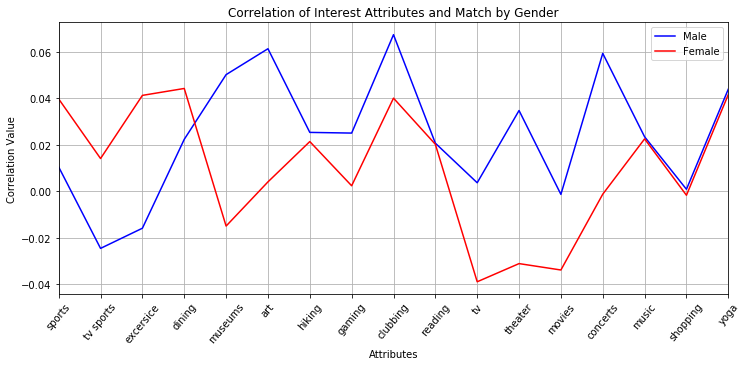

In [23]:
interest_corr_m = preproc_df.loc[preproc_df['gender']==0].corr()['match']['sports':'yoga']
interest_corr_f = preproc_df.loc[preproc_df['gender']==1].corr()['match']['sports':'yoga']

plt.figure(figsize=(12,5))
plt.title('Correlation of Interest Attributes and Match by Gender')
plt.xlabel('Attributes')
plt.ylabel('Correlation Value')

ax1 = interest_corr_m.plot(color='blue', grid=True, label='Male')
ax2 = interest_corr_f.plot(color='red', grid=True, label='Female')

labels = ['sports','tv sports','excersice','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga',]
plt.xticks(arange(17), labels, rotation=50)
plt.legend()
plt.show()

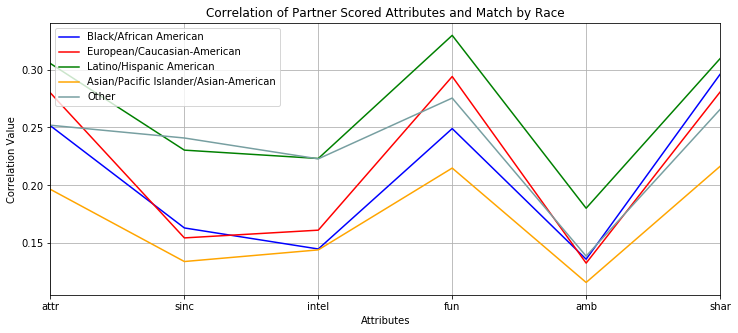

In [16]:
## RACE

interest_corr_1 = preproc_df.loc[preproc_df['race']==1].corr()['match']['attr':'shar']
interest_corr_2 = preproc_df.loc[preproc_df['race']==2].corr()['match']['attr':'shar']
interest_corr_3 = preproc_df.loc[preproc_df['race']==3].corr()['match']['attr':'shar']
interest_corr_4 = preproc_df.loc[preproc_df['race']==4].corr()['match']['attr':'shar']
#interest_corr_5 = preproc_df.loc[preproc_df['race']==5].corr()['match']['attr':'shar']
interest_corr_6 = preproc_df.loc[preproc_df['race']==6].corr()['match']['attr':'shar']

plt.figure(figsize=(12,5))
plt.title('Correlation of Partner Scored Attributes and Match by Race')
plt.xlabel('Attributes')
plt.ylabel('Correlation Value')

ax1 = interest_corr_1.plot(color='blue', grid=True, label='Black/African American')
ax2 = interest_corr_2.plot(color='red', grid=True, label='European/Caucasian-American')
ax3 = interest_corr_3.plot(color='green', grid=True, label='Latino/Hispanic American')
ax4 = interest_corr_4.plot(color='orange', grid=True, label='Asian/Pacific Islander/Asian-American')
#ax5 = interest_corr_5.plot(color='#88498F', grid=True, label='Native American')
ax6 = interest_corr_6.plot(color='#779FA1', grid=True, label='Other')

plt.legend()
plt.show()

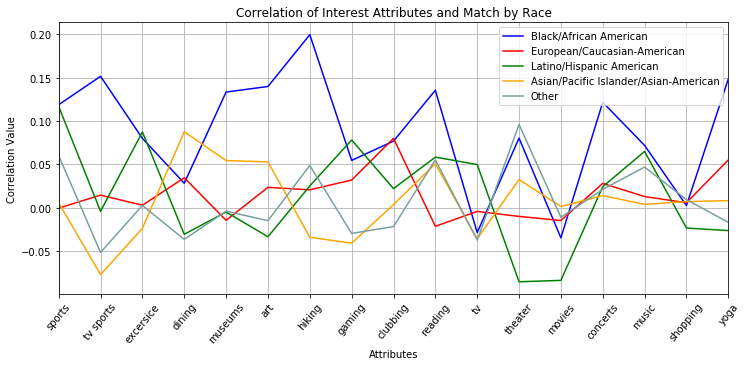

In [24]:
## RACE

interest_corr_1 = preproc_df.loc[preproc_df['race']==1].corr()['match']['sports':'yoga']
interest_corr_2 = preproc_df.loc[preproc_df['race']==2].corr()['match']['sports':'yoga']
interest_corr_3 = preproc_df.loc[preproc_df['race']==3].corr()['match']['sports':'yoga']
interest_corr_4 = preproc_df.loc[preproc_df['race']==4].corr()['match']['sports':'yoga']
#interest_corr_5 = preproc_df.loc[preproc_df['race']==5].corr()['match']['attr':'shar']
interest_corr_6 = preproc_df.loc[preproc_df['race']==6].corr()['match']['sports':'yoga']

plt.figure(figsize=(12,5))
plt.title('Correlation of Interest Attributes and Match by Race')
plt.xlabel('Attributes')
plt.ylabel('Correlation Value')

ax1 = interest_corr_1.plot(color='blue', grid=True, label='Black/African American')
ax2 = interest_corr_2.plot(color='red', grid=True, label='European/Caucasian-American')
ax3 = interest_corr_3.plot(color='green', grid=True, label='Latino/Hispanic American')
ax4 = interest_corr_4.plot(color='orange', grid=True, label='Asian/Pacific Islander/Asian-American')
#ax5 = interest_corr_5.plot(color='#88498F', grid=True, label='Native American')
ax6 = interest_corr_6.plot(color='#779FA1', grid=True, label='Other')

labels = ['sports','tv sports','excersice','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga',]
plt.xticks(arange(17), labels, rotation=50)
plt.legend()
plt.show()

In [45]:
'''
Based on the differences in shape and magnitude in FIGURES, it is possible to come to the conclusion that there are
different patterns of attribute correlation in different clusters of gender and race. Although some are significantly
more pronounced, all attributes show some level of differentiation. It should be noted that, when dealing with gender 
or racial patterns, ethical concientiousness must be considered. The gender and racial patterns described here in no 
way reflect any judgements or statements on external cultural groups as a whole, and are used excusively to better 
impute data *within* these small and nonrepresentative subsets of the speed dating cohort.

Generally speaking, the preferences of the six partner scored attributes followed the same trends in both gender and
racial groups, although with slight variations in magnitude and direction. Interests, on the other hand, differed 
quite significantly between both gender and racial groups. From a gender perspective, the greatest differences of correlations were in the tv, tv_sports, theatre, and movies 
attributes and the greatest similarities were between music, shopping, and yoga. From a racial perspective, each group
held slightly different values, with hiking being the attribute with the greatest variance. 

Based on these observations, imputation can be broken down and tailored to specifically clustered demographics. To 
confirm that this change in process led to a neutral or better outcome, prediction accuracy found using the predict 
method from the naive approach was compared with that of the base model. 
'''
# Imputation
#naive_df = naive_df.apply(lambda x: x.fillna(),axis=0)


for gender_v in range(0,2):
    for race_v in range(1,7):
        if(race_v != 5):
            m = preproc_df[(preproc_df['gender'] == gender_v) & (preproc_df['race'] == race_v)].mean().round()
            preproc_df.ix[(preproc_df['gender'] == gender_v) & (preproc_df['race'] == race_v)] = preproc_df.ix[(preproc_df['gender'] == gender_v) & (preproc_df['race'] == race_v)].fillna(m)

print("Assigned mean values")

Assigned mean values


In [81]:
test_preproc_df = preproc_df.select_dtypes(exclude=['O'])
test_preproc_df = test_preproc_df.apply(lambda x: x.fillna(x.mean()),axis=0)
predict(test_preproc_df)

Prediction Accuracy: 0.875813720581


Predicted,0,1
Actual,,
0,1658,32
1,216,91


In [132]:
'''
Clearly, the above improvements produced a marked increase in prediction accuracy, and can thus be considered successful.
Some values, however, were still not imputed, as no mean could be calculated for the given cluster. Five attributes in
particular, mn_sat, tuition, income, undergra and zipcode, all had above 10% and up to 64% missing values, while all
other attributes were almost 99% or more complete. Thus, it was hypothesized that these five attributes would not be
able to be imputed, and thus must be eliminated. To ensure that this did not negatively impact the model generation
process, prediction accuracy was again calculated and compared to the base model.

'''

preproc_df = preproc_df.drop(['mn_sat', 'tuition', 'income', 'undergra', 'zipcode'], axis=1)
preproc_df = preproc_df.select_dtypes(exclude=['O'])
preproc_df = preproc_df.apply(lambda x: x.fillna(x.mean()),axis=0)
predict(preproc_df)

Prediction Accuracy: 0.880821231848


Predicted,0,1
Actual,,
0,1670,17
1,221,89


In [112]:
'''
Prediction accuracy with the five removed attributes remained increased again, with a 0.4% increase in prediction 
accuracy. 

The rate of improvement of the generated models was decreasing with each subsequent improvement, and seemed
almost to be making negligible changes or changing based on the inherent randomness of model generation. Therefore, 
it seemed as though the only sensible response considering time and computational resources was to halt 
any further data preprocessing and work to improve the method of model generation or model use. 

As the number of attributes in the dataset was reduced by over 40%, it was hypothesized that other model generation
techniques, which were formerly eschewed due to dataset size, might now be applicable. To test this, three other model
generation techniques, Naive Bayesian predicition, Multi-layer Perceptron prediction, and SVM prediction would be
applied to the dataset and compared with the Random Forest technique. 

This adds another wrinkle to the problem. While the Random Forest algorithm doesn't rely on the normalization of
data because it only compares values relatively, SVM and MLP techniques work best with normalized data. Thus, 
the data would have to be normalized. On top of this, to increase the amount of exposure of data to the model 
generating algorithms, k-fold cross validation was employed as well, with the k-val set to 5 based on industry
standards [REF].

http://statweb.stanford.edu/~tibs/sta306bfiles/cvwrong.pdf

'''

# Cross Validation

In [ ]:
from sklearn.naive_bayes import GaussianNB
>>> gnb = GaussianNB()
>>> y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)